In [4]:
from IPython.display import Image

## Lecture Material: https://drive.google.com/drive/folders/1s3irmcInqppiKI18rXIY-pnFRbSwd7jq?usp=sharing

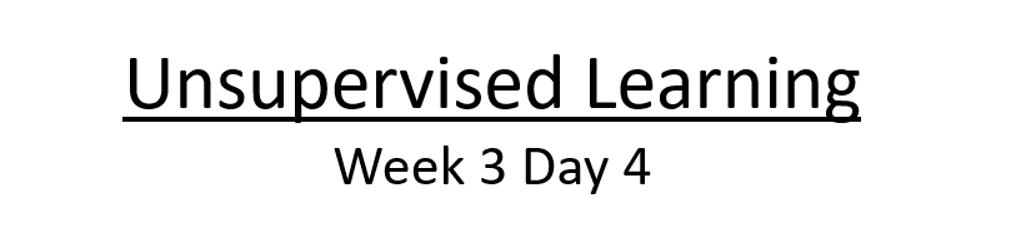

In [5]:
Image(filename='title.PNG')

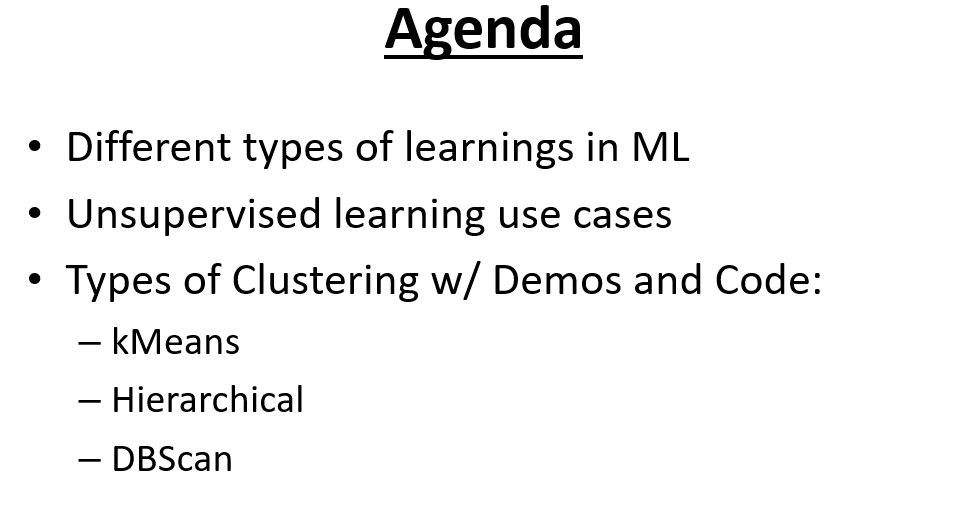

In [3]:
Image(filename='agenda.PNG')

# What is  Machine Learning?
### 1. ML is a technique where a certain computer program accepts inputs and predicts a target variable. 
### 2. The way this is achieved is by training the algorithm on a sample of dataset
### 3. There is cost/penalty function which is monitored as it is moving through the data points.
### 4. The algorithm tries to reduce the cost/penalty function as much as possible.
### 5. By doing so the algorithm gets closer to predicting correct values

<img src="./MLTrainingPhase.jpg" >
<img src="./MLTrainingPhase2.jpg" width="650">
<img src="./regression vs classification.jpg" width="650">

# This type of machine learning falls under Supervised Machine Learning

# Other Types of Learning in Machine Learning

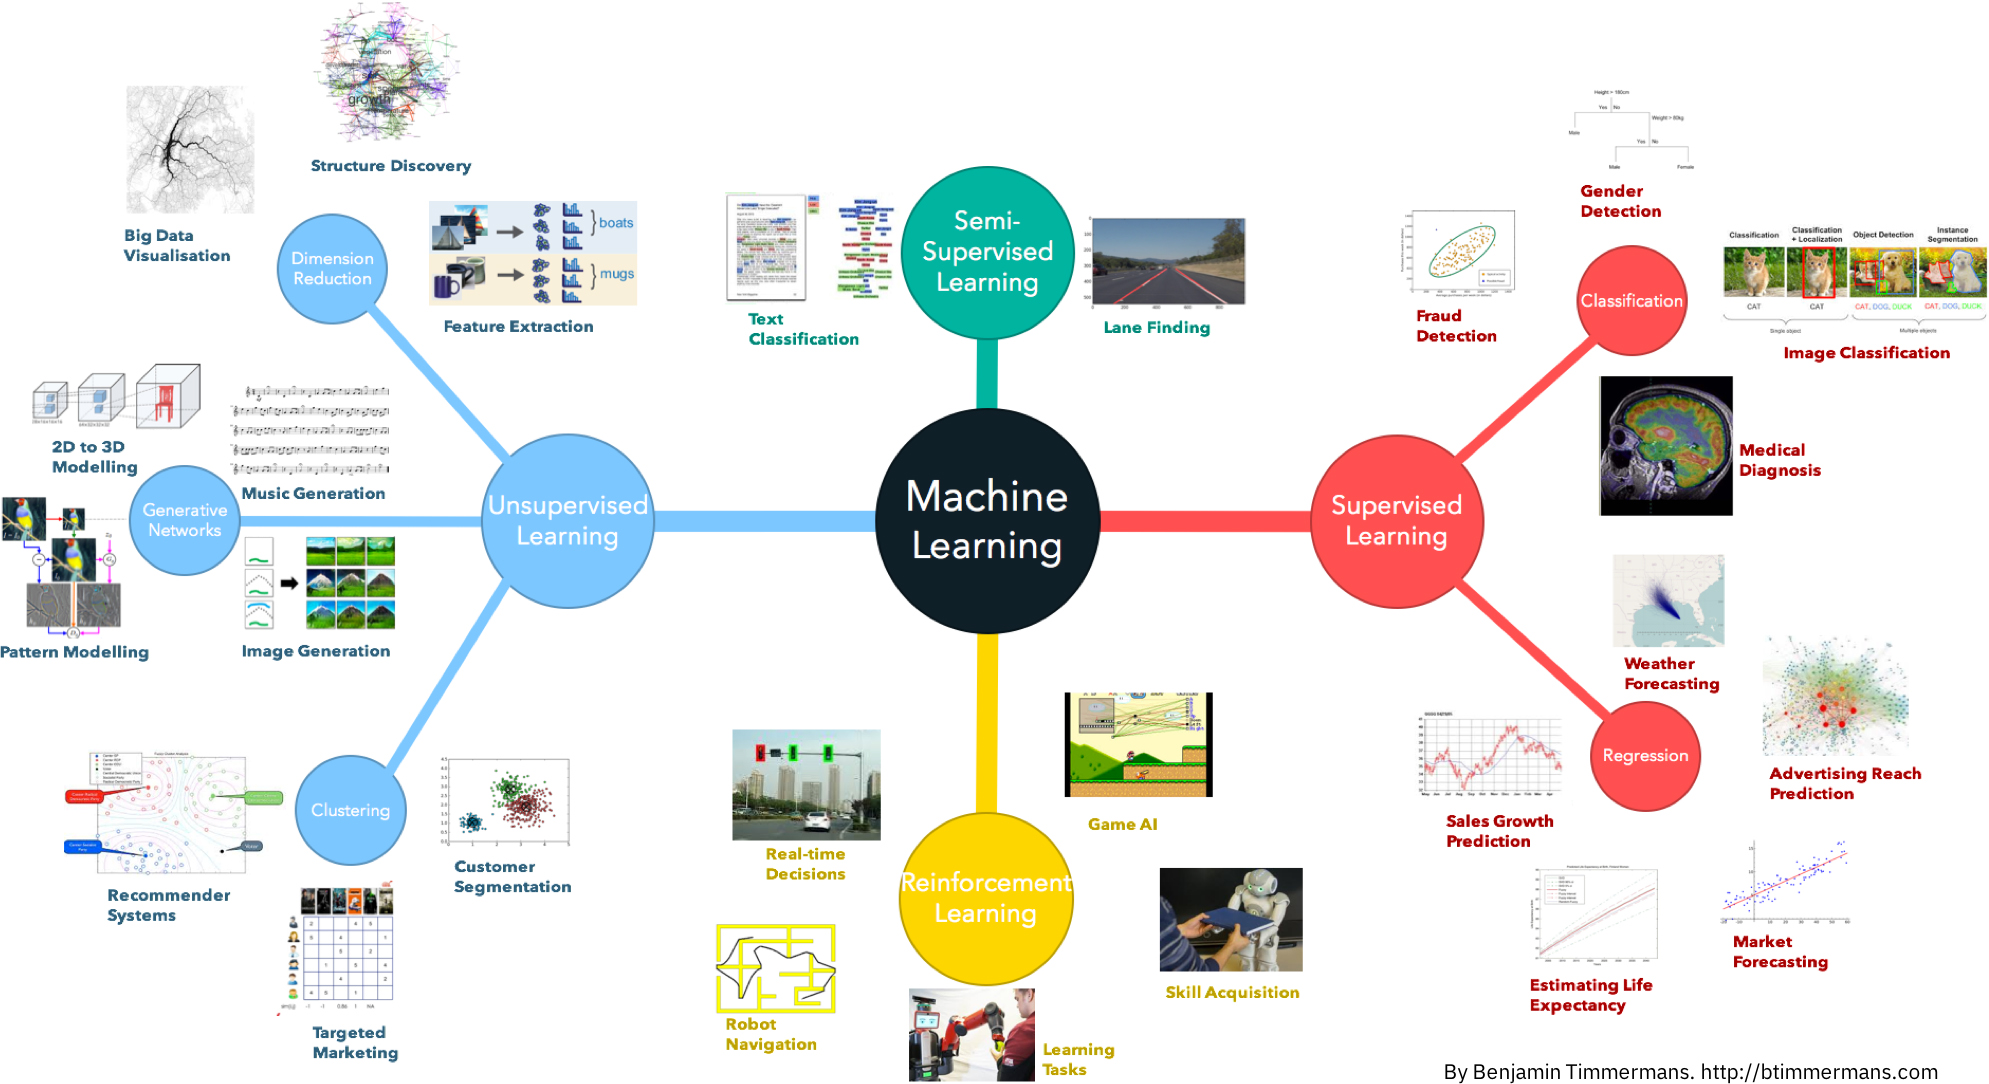

In [8]:
Image(filename='MLtypes.jpg')

# Unsupervised Learning 
* The art of drawing inferences from data which does not have <b>labels (target,Y)</b>. 
* We are not trying to predict a label, we are trying to group data together on some similar attributes. ie. **Clustering**

## Supervised vs Unsupervised Learning
<img src="SupervisedUnsupervised.png" width='700'>

# <u> Applications in Industry of Unsupervised Learning/Clustering:</u>

Being able to identify similarities and extract **actionable business insights** in a large dataset is ***very*** valuable!

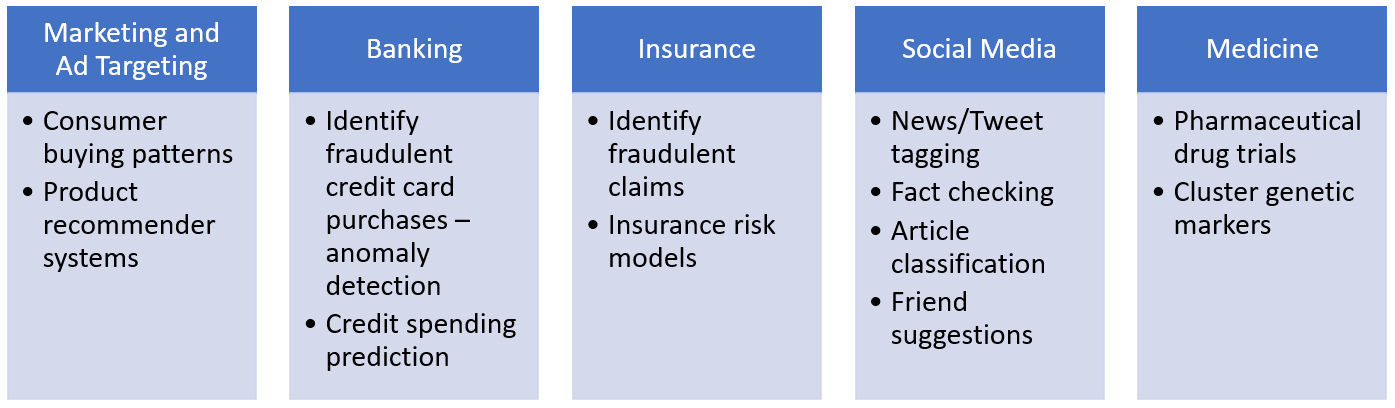

In [20]:
Image(filename='5.PNG')

# Clustering
* Creating groups out of data points based on closeness.
* Dividing the data into clusters can be on the basis of centroids, distributions, densities, etc

# Exploring Different Types of Clustering Algorithms

## <u>1. K-Means Clustering</u>

### 1. The motivation and purpose of the technique 
### 2. Explanation of the k-means clustering and EM algorithm - How it works
### 3. Shortcomings of the Algorithm
### 4. Show example code
### 5. Show Real life example (digits or image compression)

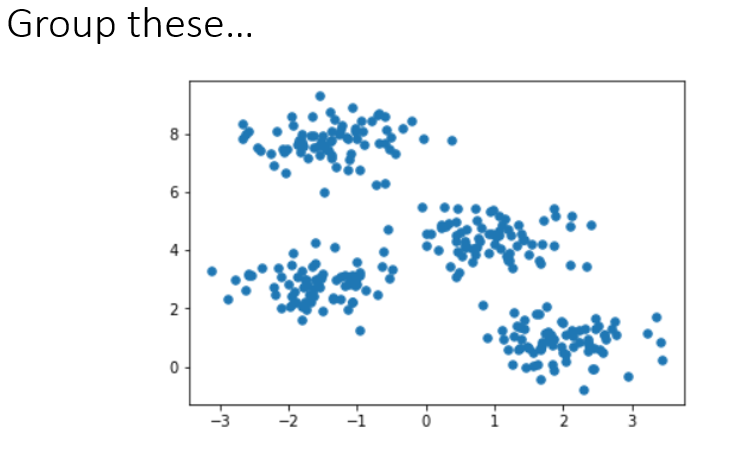

In [2]:
Image(filename='1.PNG')

# Humans are very good as identifying similarities in data ... even with very little context.

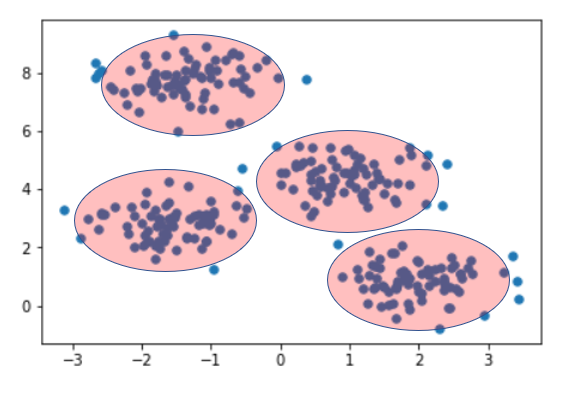

In [3]:
Image(filename='2.PNG')

# Can we develop techniques that allow computers to identify similarities in ***very large datasets*** with ***little to no context*** aswell?

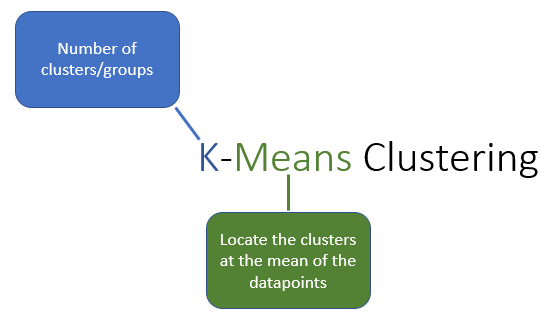

In [4]:
Image(filename='3.PNG')

# K-Means Clustering

**K-Means Clustering** is a *unsupervised* clustering machine learning algorithm. It finds clusters in data based on the data attributes alone (not the labels).

K-Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.


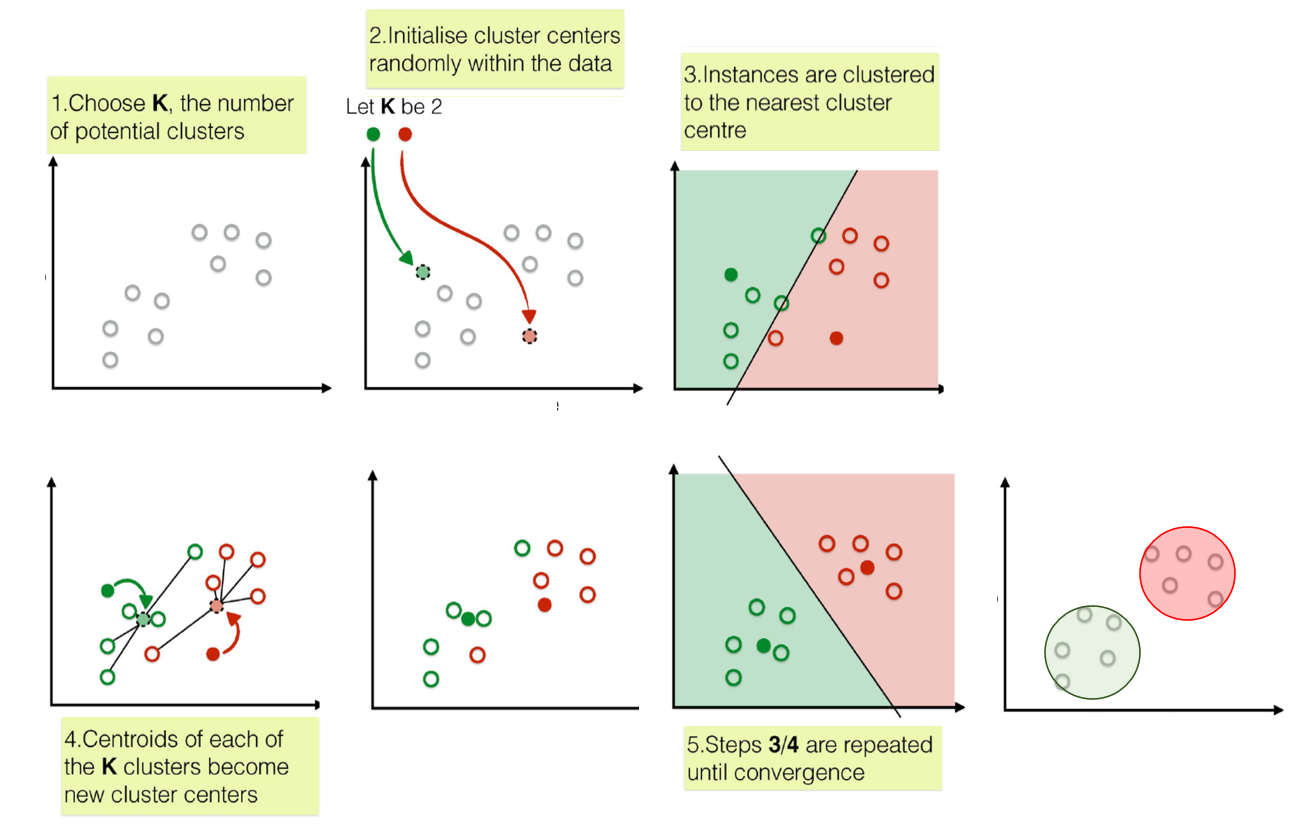

In [7]:
Image(filename='4.PNG')

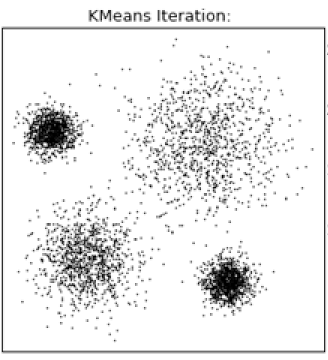

In [41]:
Image(filename='kMeans.gif')

### How KMeans works - Activity - (5 mins)
Go to the link and try choosing centroids to see how kmeans works visually:https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Follow-up Question: Was it easy to decide clusters always?

## This is also known as the Expectation Maximization (EM) algorithm. 

## <u>Some Short-comings of the algorithm:</u>

### 1. The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

### 2. Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted. - We will see other algorithms that do not need this specification

#### Importing necessary libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means

%matplotlib inline

## Let's take a look at how KMeans operates on a simple cluster. To emphasize that this is unsupervised, we'll not plot the color of the clusters:

### Generate data to cluster

In [8]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples = 3000,  # number of datapoints to generate
    centers = 4, # How many cluster centers
    cluster_std  = 0.60, # Standard deviation for each cluster
    random_state = 0 # Set seed so clusters are same for everyone
)

#### Plot the generated data

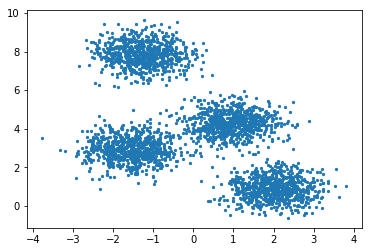

In [14]:
plt.scatter(X[:,0],X[:,1],s=5)

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

### Apply K-Means Algorithm

#### Build model for prediction
There are 4 clusters, so we will build a model for 4 clusters.

In [23]:
model = KMeans(3) # Since there are 4 clusters

#### Train model

In [24]:
model.fit(X)   #This is where the EM algorithm is iterating

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions

In [25]:
y_pred = model.predict(X)
print(y_pred)

[1 2 0 ... 1 1 0]


#### Plot predicted clusters

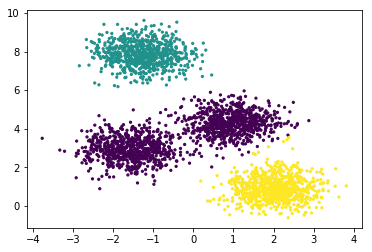

In [26]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)

The KMeans algorithm identifies the four cluster of points in a manner very similar to what we would do by eye!

<u>**Example Table of Contents**</u>
 - <a href="#E1">Example 1: Digits</a>
 - <a href="#E2">Example 2: Colour Compression</a>

## <a name="E1">Example 1: Digits</a>
For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

### Import digit data

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Number of Data Points:",digits.data.shape)

Number of Data Points: (1797, 64)


#### View sample data
The data that we imported is a set of images of written numbers. The data is provided in 64 bit vector format, and must be reshaped to 8x8 to be properly viewed as an image. Below we can see 10 random number images from the dataset:

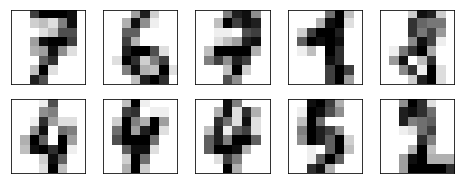

In [12]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    indx = np.random.randint(0,len(digits.data))
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(digits.data[indx].reshape((8,8)), cmap=plt.cm.binary)

### Apply K-Means Algorithm

#### Build model
Here we will build a `sklearn KMeans` model with 10 possible clusters (0-9):

In [13]:
model = KMeans(n_clusters=10)

#### Train & predict

In [14]:
clusters = model.fit_predict(digits.data)

### Evaluate generated clusters

#### Shape of clusters

In [15]:
model.cluster_centers_.shape

(10, 64)

We see that there are 10 clusters in 64 dimensions. 

#### Visualize clusters
Let's visualize each of these cluster centers to see what they represent. The 64 size vector is reshaped into a 8x8, and visualized using matplotlib.

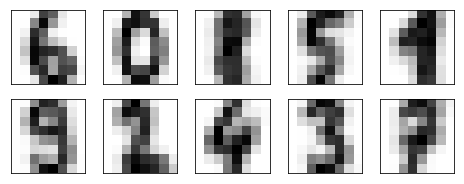

In [16]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

From above we can see that even *without label*, KMeans is able to find clusters whose mean are recognizable as digits (with apologies to number 8!).

## <a name="E2">Example 2: Colour Compression - AKA the Bob Ross Example</a>
One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

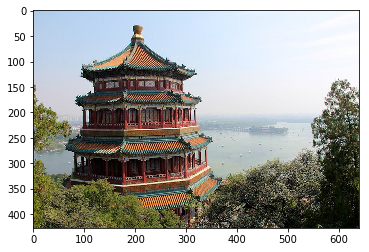

In [62]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

# Show image
plt.imshow(china)
plt.grid(False)

In [63]:
#from sklearn.datasets import load_sample_image
china1 = load_sample_image('china.jpg')   
#china.dtype                              
china.shape

(427, 640, 3)

### Rescale & Flatten image

We can see the shape of the image using the `shape` parameter of the the ndarray

In [64]:
china.shape

(427, 640, 3)

The image above is 640 x 427 and has 3 channels corresponding to Red, Green, and Blue (RGB).

We want to rescale the colors in this image so they lie between 0 and 1 (normalize), and then reshape the array into a vector for typical scikit-learn style input:

This is an 8 bit image so the color values range between 0 and 255.

#### Rescale

In [65]:
X = china / 255.0
X[0:5,0:5,1] # show sample

array([[0.78823529, 0.78823529, 0.78823529, 0.78823529, 0.78823529],
       [0.78039216, 0.78431373, 0.78431373, 0.78823529, 0.78823529],
       [0.78823529, 0.78823529, 0.78823529, 0.78823529, 0.78823529],
       [0.79215686, 0.79215686, 0.79215686, 0.79215686, 0.78823529],
       [0.78823529, 0.78823529, 0.79215686, 0.79215686, 0.79215686]])

In [66]:
X = X.reshape(-1,3)
X.shape

(273280, 3)

In [67]:
427*640   #Now the image exists as a long column vector of RGB channels

273280

We now have $427 \times 640 = 273,280$ points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

### Apply KMeans

#### Rescale image to decrease runtime

New image shape:  (143, 214, 3)


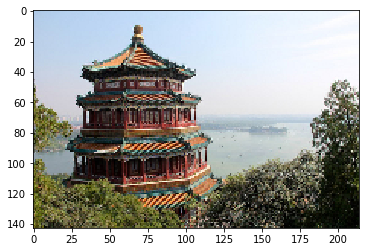

In [68]:
image = china[::3,::3,:]
print ("New image shape: ",image.shape)
plt.imshow(image)
plt.grid(False)

#### Reshape and flatten image

In [69]:
X = (image/255.0).reshape(-1,3)

#### Build KMeans model
w/ 5 clusters corresponding to allowable number of colors

In [70]:
n_colors = 5 # how much compression
model = KMeans(n_colors)

#### Fit & predict with  model

In [71]:
labels = model.fit_predict(X)

#### Get new clustered image with binned colors

In [72]:
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255.0 * new_image).astype(np.uint8)

In [73]:
print(labels[300:400])

[3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [29]:
print("first 3 colours:\n",colors[:3])

first 3 colours:
 [[0.24733184 0.25034334 0.08356085]
 [0.81366981 0.83293876 0.86274994]
 [0.61241675 0.56169717 0.40532812]]


In [30]:
print("image shape: {}".format(X.shape))
print("cluster shape: {}".format(colors.shape))
print("label shape: {}".format(labels.shape))

image shape: (30602, 3)
cluster shape: (32, 3)
label shape: (30602,)


#### Plot results

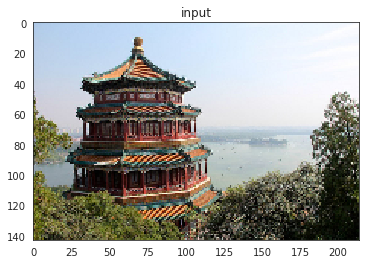

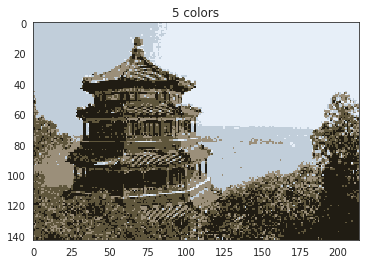

In [74]:
# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Now we have reduced the $256^3$ possible colors to only 64. You can play with the n_colors paramter to reduce the number of allowable colors.

## 2. Hierchical Clustering
In the dendrogram, each leaf corresponds to one object. As we move
up the tree, objects that are similar to each other are combined into branches, which
are themselves fused at a higher height.

The height of the fusion, provided on the vertical axis, indicates the (dis)similarity/distance
between two objects/clusters. The higher the height of the fusion, the less similar the
objects are

One of the problems with hierarchical clustering is that, it does not tell us how many
clusters there are, or where to cut the dendrogram to form clusters

#### Technique: 
<img src="./singlelink1.jpg"/>
<img src="./singlelink2.jpg"/>
<img src="./dendogram1.jpg"/>


### [ source: 'https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019' ]

### Linkage Criteria
* How are you going to calculate distance between two smallest clusters and group them based on min distance
* There isnt a single way to do this

### Types of Linkage
<img src="./singlelinkdist.jpg"/>
<img src="./completelinkdist.jpg"/>
<img src="./avglinkdist.jpg"/>

## Clustering Demo using <code>iris</code> dataset
<img src="./iris.jfif" width="750"/>

In [32]:
from sklearn import datasets

iris = datasets.load_iris()

View the data first 10 samples

In [33]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

#### view the <code>target</code> labels.

In [34]:
iris.target #hidden

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(iris.data)

In [36]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

[source: 'Udacity' ]

In [37]:
from sklearn.metrics import adjusted_rand_score

single_ar_score = adjusted_rand_score(iris.target, single_pred)

In [38]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

Which algorithm has higher <code> adjusted_rand_score</code>

In [39]:
print( "Scores: \nSingle:", single_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Single: 0.5637510205230709 
Complete:  0.64225125183629 
Average:  0.7591987071071522


To visualize the cluster result we will use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [40]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'average'

linkage_matrix = linkage(iris.data, linkage_type)

#### Plot <code>linkage</code> matrix using <code>dendogram</code> in <code>scipy</code>

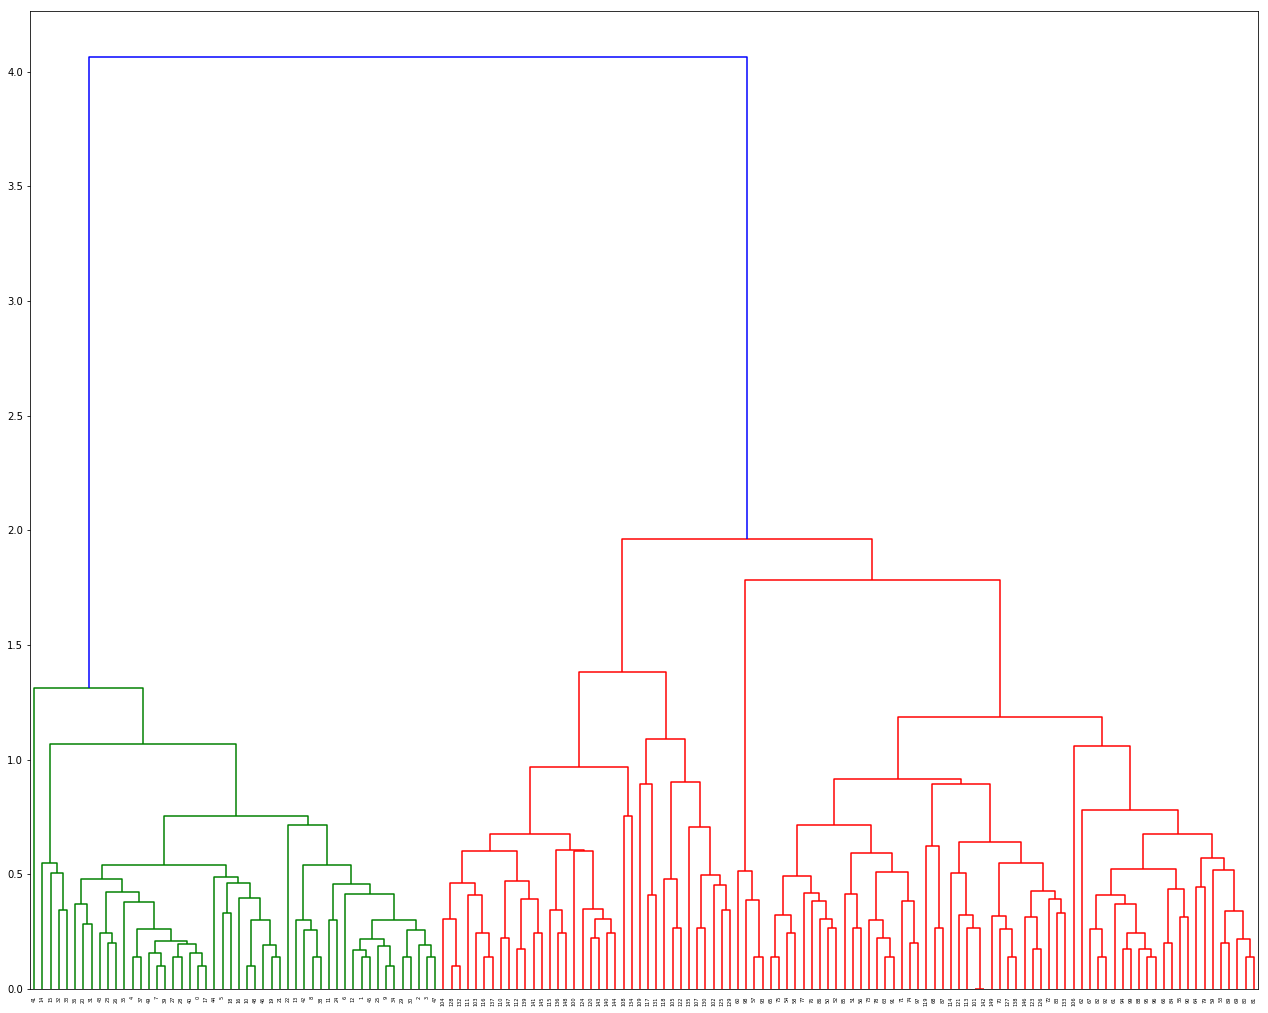

In [57]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

## 3. DBScan(Density-Based Spatial Clustering of Applications with Noise)

## What does DBScan allows us to do?

<img src='dbscanmotivation.PNG' width="800"/>


* DBSCAN is a nice alternative to k-means when you don't know how many clusters to expect in your data, but you do know something about how the points should be clustered in terms of density (distance between points in a cluster).

* DBSCAN datapoints do not have to be spatial data; they can be color data, intensity values, or other numerical features! This means we can cluster not only based upon proximity, but we can cluster similarly colored objects!


#### [source: 'https://github.com/chriswernst/dbscan-python']

### How DBScan Works?


Consider a set of points in some space to be clustered. Let **R be a parameter specifying the radius of a neighborhood with respect to some point** and let **M be minimum number of points we want in a neighbourhood to define a cluster**. 

<img src='DBScan.PNG' width="800"/>


For the purpose of DBSCAN clustering, the points are classified as **core points**, **border points** and **outliers**, as follows:

* A point p is a **core point** if at least M points are within distance R of it (including p).
* A point s is a **border point** if it is near a core point but doesn't have M points in its R neighbourhood.
* A point q is **directly density-reachable** from p if point q is within distance R from core point p. Points are only said to be directly reachable from core points.
* A point t is **density-reachable** from p if there is a path p1, ..., pn with p1 = p and pn = t, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of t. In the image below point t is density reachable from point p via point q.
* All points in this chain path p1, ..., pn are called **density connected**.
* All points not reachable from any other point are **outliers or noise points**.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.

<img src='https://www.mdpi.com/applsci/applsci-09-04398/article_deploy/html/images/applsci-09-04398-g001.png' />

### Advantages of DBScan
<img src='DBScanPros.PNG' />
[source: Wikipedia]

## Demo: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

<img src='dbscansmile.PNG' />

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


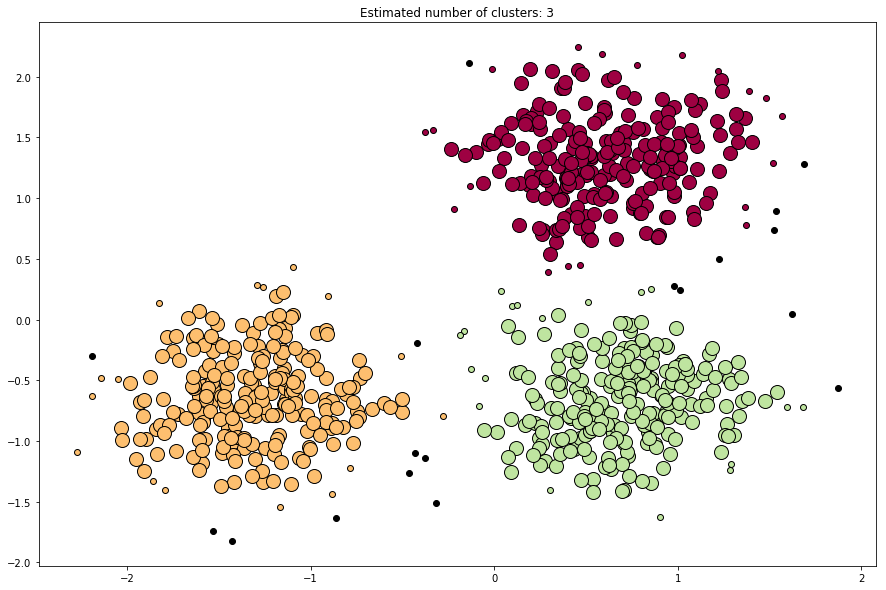

In [24]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()